In [1]:
# code for loading the format for the notebook
import os

# path : store the current path to convert back to it later
path = os.getcwd()
os.chdir('../notebook_format')
from formats import load_style
load_style()

In [69]:
os.chdir(path)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, load_digits
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics.pairwise import pairwise_distances

# watermark is a magic for printing version info: https://github.com/rasbt/watermark
%matplotlib inline
%load_ext watermark
%watermark -p numpy,scikit-learn,matplotlib,seaborn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark

numpy 1.10.4
scikit-learn 0.17.1
matplotlib 1.5.1
seaborn 0.7.1


In [54]:
def scatter_plot( X, y ):
    
    fig = plt.figure( figsize = ( 6, 6 ) )
    
    # https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html
    num_class = np.unique(y).shape[0]
    palette = np.array( sns.color_palette( 'hls', num_class ) )
    color = palette[y.astype(np.int)]
    plt.scatter( X[ :, 0 ], X[ :, 1 ], s = 40, c = color )
    # plt.xlim(-25, 25)
    # plt.ylim(-25, 25)
    plt.axis('off')
    
    return fig

In [64]:
iris = load_iris()
X_pca1 = PCA( n_components = 2 ).fit_transform(iris.data)

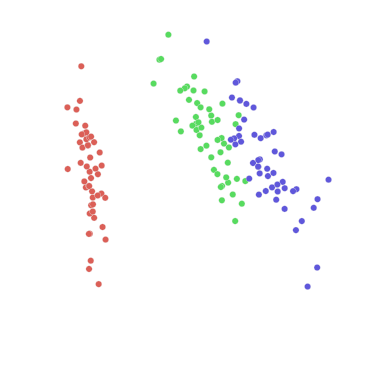

In [67]:
plot_pca = scatter_plot( X_pca1, iris.target )


Now we load the classic handwritten digits [datasets](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits). It contains 1797 images with 8 ∗ 8 = 64 pixels (64 features) each.

In [8]:
digits = load_digits()
digits.data.shape

(1797, 64)

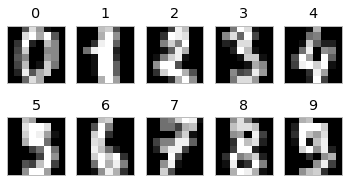

In [15]:
# visualize the images
nrows, ncols = 2, 5
plt.figure( figsize = ( 6, 3 ) )
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(digits.target[i])

plt.show()

In [63]:
X = digits.data
y = digits.target
X_tsne2 = TSNE( n_components = 2, random_state = 4321 ).fit_transform(X)
X_pca2 = PCA( n_components = 2 ).fit_transform(X)

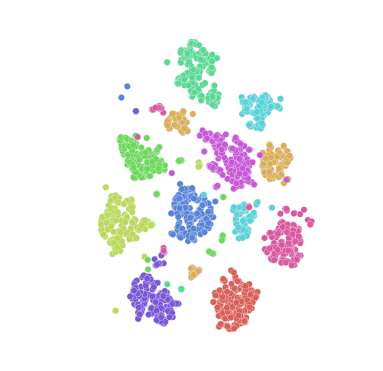

In [68]:
fig1 = scatter_plot( X_tsne2, y )

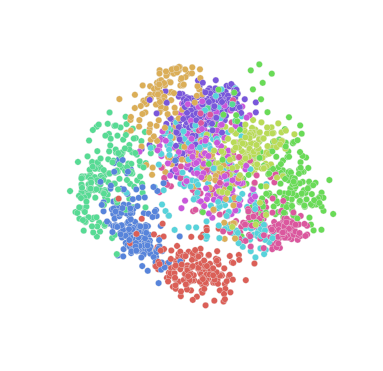

In [60]:
fig2 = scatter_plot( X_pca, y )

In [70]:
def _joint_probabilities_constant_sigma(D, sigma):
    P = np.exp(-D**2/2 * sigma**2)
    P /= np.sum(P, axis=1)
    return P

## Reference

- [An illustrated introduction to the t-SNE algorithm](https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm)


http://jmlr.csail.mit.edu/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

https://www.researchgate.net/post/Which_is_the_best_method_to_handle_the_high_dimensional_data_during_the_clustering_process